# **Predicting the Top 10 NFL Teams and Super Bowl Champs of 2025!**

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [6]:
# Loading in the data
nfl_df = pd.read_csv('/content/NFL Season 2024 Stats Dataset (Cleaned).csv')
nfl_df

,Tm,W,L,W-L%,PF,PA,PD,MoV,SoS,SRS,OSRS,DSRS
0,Buffalo Bills*,13,4,0.765,525,368,157,9.2,-1.1,8.1,7.8,0.3
1,Miami Dolphins,8,9,0.471,345,364,-19,-1.1,-1.9,-3.0,-3.5,0.4
2,New York Jets,5,12,0.294,338,404,-66,-3.9,-0.5,-4.3,-3.0,-1.4
3,New England Patriots,4,13,0.235,289,417,-128,-7.5,-0.6,-8.1,-6.2,-1.9
4,Baltimore Ravens*,12,5,0.706,518,361,157,9.2,0.6,9.9,8.0,1.9
5,Pittsburgh Steelers+,10,7,0.588,380,347,33,1.9,0.1,2.1,-0.7,2.8
6,Cincinnati Bengals,9,8,0.529,472,434,38,2.2,-0.8,1.4,5.0,-3.6
7,Cleveland Browns,3,14,0.176,258,435,-177,-10.4,1.2,-9.2,-7.1,-2.1
8,Houston Texans*,10,7,0.588,372,372,0,0.0,-0.7,-0.7,-1.5,0.8
9,Indianapolis Colts,8,9,0.471,377,427,-50,-2.9,-0.7,-3.7,-0.5,-3.2


# **Cleaning the data**

In [7]:
# Removing asterisks and plus signs from the data
nfl_df = nfl_df.replace({'\*': '', '\+': ''}, regex=True)
nfl_df

,Tm,W,L,W-L%,PF,PA,PD,MoV,SoS,SRS,OSRS,DSRS
0,Buffalo Bills,13,4,0.765,525,368,157,9.2,-1.1,8.1,7.8,0.3
1,Miami Dolphins,8,9,0.471,345,364,-19,-1.1,-1.9,-3.0,-3.5,0.4
2,New York Jets,5,12,0.294,338,404,-66,-3.9,-0.5,-4.3,-3.0,-1.4
3,New England Patriots,4,13,0.235,289,417,-128,-7.5,-0.6,-8.1,-6.2,-1.9
4,Baltimore Ravens,12,5,0.706,518,361,157,9.2,0.6,9.9,8.0,1.9
5,Pittsburgh Steelers,10,7,0.588,380,347,33,1.9,0.1,2.1,-0.7,2.8
6,Cincinnati Bengals,9,8,0.529,472,434,38,2.2,-0.8,1.4,5.0,-3.6
7,Cleveland Browns,3,14,0.176,258,435,-177,-10.4,1.2,-9.2,-7.1,-2.1
8,Houston Texans,10,7,0.588,372,372,0,0.0,-0.7,-0.7,-1.5,0.8
9,Indianapolis Colts,8,9,0.471,377,427,-50,-2.9,-0.7,-3.7,-0.5,-3.2


In [24]:
# Rename columns in dataset for clarity
nfl_df = nfl_df.rename(columns={'Tm': 'Team', 'W': 'Wins', 'L': 'Losses', 'W-L%': 'Win_Loss_Per.', 'PF': 'Team_Pts', 'PA': 'Opp_Pts',
                       'PD': 'Pts_Diff', 'SoS': 'SOS', 'OSRS': 'Off_Qlty', 'DSRS': 'Def_Qlty'})
nfl_df.head()

,Team,Wins,Losses,Win_Loss_Per.,Team_Pts,Opp_Pts,Pts_Diff,MoV,SOS,SRS,Off_Qlty,Def_Qlty,Win_Loss_Ratio
0,Buffalo Bills,13,4,0.765,525,368,157,9.2,-1.1,8.1,7.8,0.3,2.600000
1,Miami Dolphins,8,9,0.471,345,364,-19,-1.1,-1.9,-3.0,-3.5,0.4,0.800000
2,New York Jets,5,12,0.294,338,404,-66,-3.9,-0.5,-4.3,-3.0,-1.4,0.384615
3,New England Patriots,4,13,0.235,289,417,-128,-7.5,-0.6,-8.1,-6.2,-1.9,0.285714
4,Baltimore Ravens,12,5,0.706,518,361,157,9.2,0.6,9.9,8.0,1.9,2.000000


In [25]:
nfl_df.isnull().sum()

,0
Team,0
Wins,0
Losses,0
Win_Loss_Per.,0
Team_Pts,0
Opp_Pts,0
Pts_Diff,0
MoV,0
SOS,0
SRS,0


In [26]:
# Checking data types
nfl_df.dtypes

,0
Team,object
Wins,int64
Losses,int64
Win_Loss_Per.,float64
Team_Pts,int64
Opp_Pts,int64
Pts_Diff,int64
MoV,float64
SOS,float64
SRS,float64


In [27]:
# Converting Team column to string value
nfl_df['Team'] = nfl_df['Team'].astype(str)

In [28]:
nfl_df.dtypes

,0
Team,object
Wins,int64
Losses,int64
Win_Loss_Per.,float64
Team_Pts,int64
Opp_Pts,int64
Pts_Diff,int64
MoV,float64
SOS,float64
SRS,float64


In [29]:
# Calculating the basic statistics of the data
print(nfl_df.describe())

            Wins     Losses  Win_Loss_Per.   Team_Pts     Opp_Pts    Pts_Diff  \
count  32.000000  32.000000      32.000000   32.00000   32.000000   32.000000   
mean    8.500000   8.500000       0.499937  389.50000  389.500000    0.000000   
std     3.707012   3.707012       0.218166   77.22109   52.437982  112.096732   
min     3.000000   2.000000       0.176000  258.00000  301.000000 -193.000000   
25%     5.000000   6.000000       0.294000  338.00000  357.500000  -78.250000   
50%     8.500000   8.500000       0.500000  378.50000  385.500000   -9.500000   
75%    11.000000  12.000000       0.647000  439.00000  428.750000  100.250000   
max    15.000000  14.000000       0.882000  564.00000  534.000000  222.000000   

             MoV        SOS        SRS   Off_Qlty   Def_Qlty  Win_Loss_Ratio  
count  32.000000  32.000000  32.000000  32.000000  32.000000       32.000000  
mean   -0.006250   0.003125   0.006250  -0.003125  -0.006250        1.330463  
std     6.596966   0.932387   6.4

In [30]:
# Converting all relevant columns to numeric
numeric_cols = ['Wins', 'Losses', 'Team_Pts', 'Opp_Pts', 'Pts_Diff', 'MoV', 'SOS', 'SRS', 'Off_Qlty', 'Def_Qlty']

nfl_df[numeric_cols] = nfl_df[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [31]:
# Importing libraries/packages for plotting data
import matplotlib.pyplot as plt
import seaborn as sns

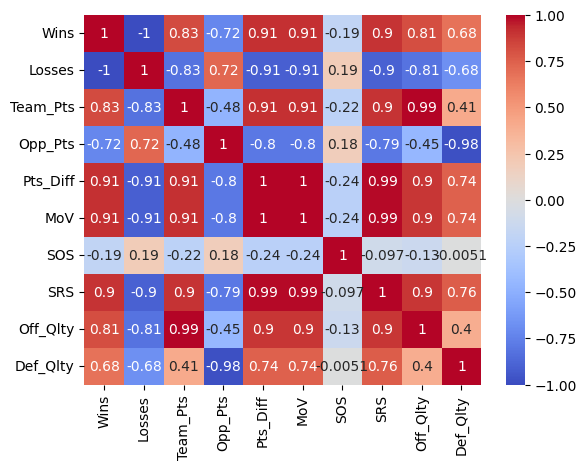

In [32]:
# Visualizing relationships between features
correlation_matrix = nfl_df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

# **Feature Engineering**

In [33]:
# Creating additional features
nfl_df['Win_Loss_Ratio'] = nfl_df['Wins'] / (nfl_df['Losses'] + 1) # To avoid dividing by 0

In [34]:
# Checking updated column in data
nfl_df.head()

,Team,Wins,Losses,Win_Loss_Per.,Team_Pts,Opp_Pts,Pts_Diff,MoV,SOS,SRS,Off_Qlty,Def_Qlty,Win_Loss_Ratio
0,Buffalo Bills,13,4,0.765,525,368,157,9.2,-1.1,8.1,7.8,0.3,2.600000
1,Miami Dolphins,8,9,0.471,345,364,-19,-1.1,-1.9,-3.0,-3.5,0.4,0.800000
2,New York Jets,5,12,0.294,338,404,-66,-3.9,-0.5,-4.3,-3.0,-1.4,0.384615
3,New England Patriots,4,13,0.235,289,417,-128,-7.5,-0.6,-8.1,-6.2,-1.9,0.285714
4,Baltimore Ravens,12,5,0.706,518,361,157,9.2,0.6,9.9,8.0,1.9,2.000000


In [35]:
# Assigning feature (X) and target (y) values
features = ['Team_Pts', 'Opp_Pts', 'Pts_Diff', 'MoV', 'SOS', 'SRS', 'Off_Qlty', 'Def_Qlty', 'Win_Loss_Ratio']
target = 'Win_Loss_Per.'

X = nfl_df[features]
y = nfl_df[target]

# **Training and Testing the Model**

In [36]:
# Splitting the data into 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% training, 20% testing

In [37]:
# Confirming split
print("Training set size:", X_train.shape, "Testing set size:", X_test.shape)

Training set size: (25, 9) Testing set size: (7, 9)


In [38]:
# Initializing and training model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [39]:
# Evaluating the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.006284965246616653


# **Predicting total wins for each NFL team**

In [77]:
# Adding total games column
nfl_df['Total_Games'] = nfl_df['Wins'] + nfl_df['Losses']
nfl_df.head()

,Team,Wins,Losses,Win_Loss_Per.,Team_Pts,Opp_Pts,Pts_Diff,MoV,SOS,SRS,Off_Qlty,Def_Qlty,Win_Loss_Ratio,Total_Games,Predicted_Win_Percentage,Predicted_Wins,Playoff,Division
0,Buffalo Bills,13,4,0.765,525,368,157,9.2,-1.1,8.1,7.8,0.3,2.600000,17,0.778755,13.238831,1,AFC
1,Miami Dolphins,8,9,0.471,345,364,-19,-1.1,-1.9,-3.0,-3.5,0.4,0.800000,17,0.412373,7.010341,0,AFC
2,New York Jets,5,12,0.294,338,404,-66,-3.9,-0.5,-4.3,-3.0,-1.4,0.384615,17,0.301604,5.127274,0,AFC
3,New England Patriots,4,13,0.235,289,417,-128,-7.5,-0.6,-8.1,-6.2,-1.9,0.285714,17,0.296560,5.041512,0,AFC
4,Baltimore Ravens,12,5,0.706,518,361,157,9.2,0.6,9.9,8.0,1.9,2.000000,17,0.679555,11.552442,1,AFC


In [41]:
# Prediction win percentage
nfl_df.loc[:, 'Predicted_Win_Percentage'] = model.predict(X)

In [42]:
# Converting predicted win percentage to predicted wins
nfl_df.loc[:, 'Predicted_Wins'] = nfl_df['Predicted_Win_Percentage'] * nfl_df['Total_Games']

In [43]:
# Sorting teams by predicted wins
nfl_df_sorted = nfl_df.sort_values(by='Predicted_Wins', ascending=False)

# Show the predicted top 10 teams of 2025
print(nfl_df_sorted[['Team', 'Predicted_Wins']].head(14))

                     Team  Predicted_Wins
20          Detroit Lions       16.969420
12     Kansas City Chiefs       14.288313
16    Philadelphia Eagles       14.212660
0           Buffalo Bills       13.238831
21      Minnesota Vikings       13.171442
4        Baltimore Ravens       11.552442
17  Washington Commanders       11.371385
13   Los Angeles Chargers       10.844140
22      Green Bay Packers       10.826741
24   Tampa Bay Buccaneers       10.576836
14         Denver Broncos       10.466546
28       Los Angeles Rams        9.281214
6      Cincinnati Bengals        9.095889
5     Pittsburgh Steelers        8.483853


# **Plotting the data**

In [44]:
# Defining top 10 variable
top_10 = nfl_df_sorted.head(10)

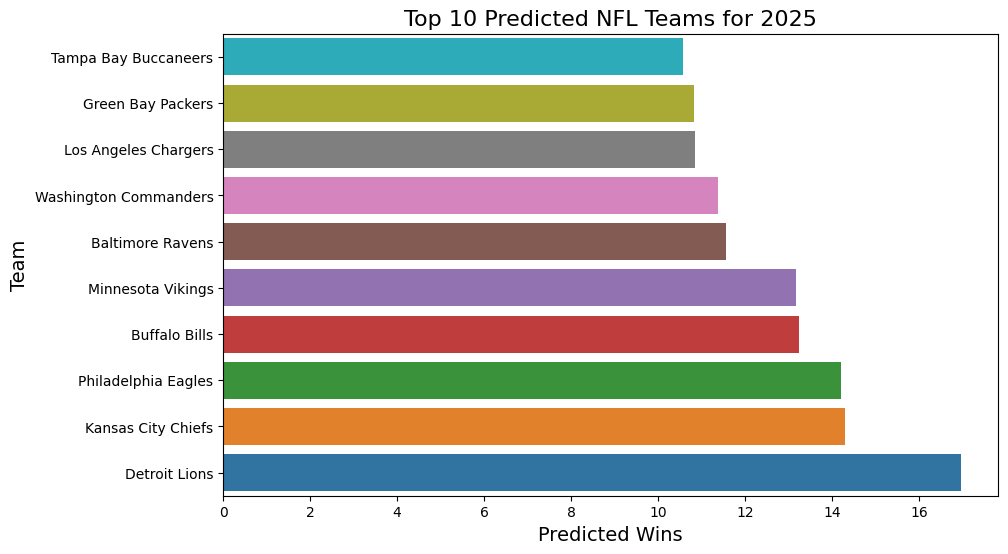

In [45]:
# Setting the style for plotting data
plt.figure(figsize=(10, 6))
sns.barplot(x='Predicted_Wins', y='Team', data=top_10, hue='Team', legend=False)

# Adding labels and title
plt.xlabel('Predicted Wins', fontsize=14)
plt.ylabel('Team', fontsize=14)
plt.title('Top 10 Predicted NFL Teams for 2025', fontsize=16)
plt.gca().invert_yaxis()
plt.show()

# **Creating the 2025 NFL Playoff Scenario**

In [46]:
# Loaing in data again to show which team made 2024 playoffs
nfl_df2 = pd.read_csv('/content/NFL Season 2024 Stats Dataset (Cleaned).csv')
nfl_df2.head()

,Tm,W,L,W-L%,PF,PA,PD,MoV,SoS,SRS,OSRS,DSRS
0,Buffalo Bills*,13,4,0.765,525,368,157,9.2,-1.1,8.1,7.8,0.3
1,Miami Dolphins,8,9,0.471,345,364,-19,-1.1,-1.9,-3.0,-3.5,0.4
2,New York Jets,5,12,0.294,338,404,-66,-3.9,-0.5,-4.3,-3.0,-1.4
3,New England Patriots,4,13,0.235,289,417,-128,-7.5,-0.6,-8.1,-6.2,-1.9
4,Baltimore Ravens*,12,5,0.706,518,361,157,9.2,0.6,9.9,8.0,1.9


In [47]:
# Defining which team made 2024 playoffs
def playoff(team):
  if '*' in team or '+' in team:
    return 1 # made the playoffs
  return 0 # missed the playoffs

nfl_df['Playoff'] = nfl_df2['Tm'].apply(playoff)
print(nfl_df[['Team', 'Playoff']].head(33))


                     Team  Playoff
0           Buffalo Bills        1
1          Miami Dolphins        0
2           New York Jets        0
3    New England Patriots        0
4        Baltimore Ravens        1
5     Pittsburgh Steelers        1
6      Cincinnati Bengals        0
7        Cleveland Browns        0
8          Houston Texans        1
9      Indianapolis Colts        0
10   Jacksonville Jaguars        0
11       Tennessee Titans        0
12     Kansas City Chiefs        1
13   Los Angeles Chargers        1
14         Denver Broncos        1
15      Las Vegas Raiders        0
16    Philadelphia Eagles        1
17  Washington Commanders        1
18         Dallas Cowboys        0
19        New York Giants        0
20          Detroit Lions        1
21      Minnesota Vikings        1
22      Green Bay Packers        1
23          Chicago Bears        0
24   Tampa Bay Buccaneers        1
25        Atlanta Falcons        0
26      Carolina Panthers        0
27     New Orleans S

## **Feature Selection for Playoff Teams**

In [48]:
# Assigning feature (X) and target (y) values
features = ['Wins', 'Pts_Diff', 'SRS', 'SOS', 'Win_Loss_Per.']
target = 'Playoff'

X = nfl_df[features]
y = nfl_df[target]

In [49]:
# Importing the libraries/packages for training and splitting data
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [50]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
# Create and train the Logistic Regression Model
model = LogisticRegression(random_state=42, solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [52]:
# Making predictions on test set
y_pred = model.predict(X_test)

In [53]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.5714285714285714
              precision    recall  f1-score   support

           0       0.67      0.50      0.57         4
           1       0.50      0.67      0.57         3

    accuracy                           0.57         7
   macro avg       0.58      0.58      0.57         7
weighted avg       0.60      0.57      0.57         7



Given the accuracy score of .571, which is little more that a coin flip, I've decided to move on from Logistic Regression and instead, create the 2025 Playoff predictor with Random Forest Regressor.

# **Random Forest Regressor**

In [54]:
# importing library Random Forest
from sklearn.ensemble import RandomForestClassifier

In [55]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
# Creating and training Random Forest Classifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [57]:
# Making prediction on the test set
y_pred = model.predict(X_test)

In [58]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.8571428571428571
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.75      1.00      0.86         3

    accuracy                           0.86         7
   macro avg       0.88      0.88      0.86         7
weighted avg       0.89      0.86      0.86         7



The accuracy is much higher at .857. Let's continue with the predicitve model.

# Organizing Teams in to Conferences

In [61]:
# Showing the predicted top 14 teams of 2025
print(nfl_df_sorted[['Team', 'Predicted_Wins']].head(14))

                     Team  Predicted_Wins
20          Detroit Lions       16.969420
12     Kansas City Chiefs       14.288313
16    Philadelphia Eagles       14.212660
0           Buffalo Bills       13.238831
21      Minnesota Vikings       13.171442
4        Baltimore Ravens       11.552442
17  Washington Commanders       11.371385
13   Los Angeles Chargers       10.844140
22      Green Bay Packers       10.826741
24   Tampa Bay Buccaneers       10.576836
14         Denver Broncos       10.466546
28       Los Angeles Rams        9.281214
6      Cincinnati Bengals        9.095889
5     Pittsburgh Steelers        8.483853


In [69]:
# Adding column of Division to dataset
afc_teams = {
    'Baltimore Ravens', 'Buffalo Bills', 'Cincinnati Bengals', 'Cleveland Browns',
    'Pittsburgh Steelers', 'Houston Texans', 'Indianapolis Colts', 'Jacksonville Jaguars',
    'Tennessee Titans', 'Denver Broncos', 'Kansas City Chiefs', 'Las Vegas Raiders',
    'Los Angeles Chargers', 'Kansas City Chiefs', 'New York Jets', 'New England Patriots',
    'Miami Dolphins'
}

nfc_teams = {
    'Arizona Cardinals', 'Atlanta Falcons', 'Carolina Panthers', 'Chicago Bears',
    'Detroit Lions', 'Green Bay Packers', 'Los Angeles Rams', 'Minnesota Vikings', 'New Orleans Saints',
    'New York Giants', 'Philadelphia Eagles', 'San Francisco 49ers', 'Seattle Seahawks',
    'Tampa Bay Buccaneers', 'Washington Commanders', 'Dallas Cowboys'
}

# Assigning teams to their respective divisons
team_to_division = {team: 'AFC' for team in afc_teams}
team_to_division.update({team: 'NFC' for team in nfc_teams})

nfl_df['Division'] = nfl_df['Team'].map(team_to_division)

In [101]:
# Updating Division to Conference
nfl_df = nfl_df.rename(columns={'Division': 'Conference'})
nfl_df.head()

,Team,Wins,Losses,Win_Loss_Per.,Team_Pts,Opp_Pts,Pts_Diff,MoV,SOS,SRS,Off_Qlty,Def_Qlty,Win_Loss_Ratio,Total_Games,Predicted_Win_Percentage,Predicted_Wins,Playoff,Conference
0,Buffalo Bills,13,4,0.765,525,368,157,9.2,-1.1,8.1,7.8,0.3,2.600000,17,0.778755,13.238831,1,AFC
1,Miami Dolphins,8,9,0.471,345,364,-19,-1.1,-1.9,-3.0,-3.5,0.4,0.800000,17,0.412373,7.010341,0,AFC
2,New York Jets,5,12,0.294,338,404,-66,-3.9,-0.5,-4.3,-3.0,-1.4,0.384615,17,0.301604,5.127274,0,AFC
3,New England Patriots,4,13,0.235,289,417,-128,-7.5,-0.6,-8.1,-6.2,-1.9,0.285714,17,0.296560,5.041512,0,AFC
4,Baltimore Ravens,12,5,0.706,518,361,157,9.2,0.6,9.9,8.0,1.9,2.000000,17,0.679555,11.552442,1,AFC


In [119]:
# Checking Teams and Conference
nfl_df[['Team', 'Conference']].head()

,Team,Conference
0,Buffalo Bills,AFC
1,Miami Dolphins,AFC
2,New York Jets,AFC
3,New England Patriots,AFC
4,Baltimore Ravens,AFC


In [103]:
# Sorting teams by predicted wins
nfl_df_sorted = nfl_df.sort_values(by='Predicted_Wins', ascending=False)

# Selecting top 7 teams per Divison
afc_playoff_teams = nfl_df_sorted[nfl_df_sorted['Conference'] == 'AFC'].head(7)
nfc_playoff_teams = nfl_df_sorted[nfl_df_sorted['Conference'] == 'NFC'].head(7)

# Combining playoff teams
playoff_teams = pd.concat([afc_playoff_teams, nfc_playoff_teams])


# Show the predicted top 14 playoff teams of 2025
print(playoff_teams[['Team', 'Predicted_Wins', 'Conference']].head(14))

                     Team  Predicted_Wins Conference
12     Kansas City Chiefs       14.288313        AFC
0           Buffalo Bills       13.238831        AFC
4        Baltimore Ravens       11.552442        AFC
13   Los Angeles Chargers       10.844140        AFC
14         Denver Broncos       10.466546        AFC
6      Cincinnati Bengals        9.095889        AFC
5     Pittsburgh Steelers        8.483853        AFC
20          Detroit Lions       16.969420        NFC
16    Philadelphia Eagles       14.212660        NFC
21      Minnesota Vikings       13.171442        NFC
17  Washington Commanders       11.371385        NFC
22      Green Bay Packers       10.826741        NFC
24   Tampa Bay Buccaneers       10.576836        NFC
28       Los Angeles Rams        9.281214        NFC


# **Running Super Bowl simulation**

In [104]:
# Sorting teams within each conference
playoff_teams = playoff_teams.sort_values(['Conference', 'Predicted_Win_Percentage'], ascending=[True, False])

In [167]:
# Creating Super Bowl prediction function
def predict_winner(team1, team2):
    prob_team1 = team1["Predicted_Win_Percentage"] / (
        team1["Predicted_Win_Percentage"] + team2["Predicted_Win_Percentage"]
    )
    return team1["Team"] if np.random.rand() < prob_team1 else team2["Team"]

# Getting top teams from each conference
afc_champion = playoff_teams[playoff_teams['Conference'] == 'AFC'].iloc[0]
nfc_champion = playoff_teams[playoff_teams['Conference'] == 'NFC'].iloc[0]

# Example of predicted winner based on Kansas City vs Detroit Lions
winner = predict_winner(afc_champion, nfc_champion)
print(f"Predicted 2025 Super Bowl Champions: {winner}")

Predicted 2025 Super Bowl Champions: Detroit Lions


After running the simulation several times, the predicted 2025 Super Bowl Champions are the Detroit Lions!


## **Playoff Simulator Leading to 2025 Super Bowl Champion**

In [155]:
# Sort teams within each division by Predicted_Win_Percentage
playoff_teams = playoff_teams.sort_values(['Conference', 'Predicted_Win_Percentage'], ascending=[True, False])

def predict_winner(team1, team2):
    prob_team1 = team1["Predicted_Win_Percentage"] / (
        team1["Predicted_Win_Percentage"] + team2["Predicted_Win_Percentage"]
    )
    return team1 if np.random.rand() < prob_team1 else team2

def simulate_playoffs(conference_teams):
    # Wild Card Round
    wc_winners = [
        predict_winner(conference_teams.iloc[1], conference_teams.iloc[6]),
        predict_winner(conference_teams.iloc[2], conference_teams.iloc[5]),
        predict_winner(conference_teams.iloc[3], conference_teams.iloc[4])
    ]

    # Divisional Round
    div_winners = [
        predict_winner(conference_teams.iloc[0], wc_winners[2]),
        predict_winner(wc_winners[0], wc_winners[1])
    ]

    # Conference Championship
    return predict_winner(div_winners[0], div_winners[1])

# Simulate playoffs for each conference
afc_teams = playoff_teams[playoff_teams['Conference'] == 'AFC'].head(7)
nfc_teams = playoff_teams[playoff_teams['Conference'] == 'NFC'].head(7)

afc_champion = simulate_playoffs(afc_teams)
nfc_champion = simulate_playoffs(nfc_teams)

# Simulate Super Bowl
super_bowl_winner = predict_winner(afc_champion, nfc_champion)

print(f"AFC Champion: {afc_champion['Team']}")
print(f"NFC Champion: {nfc_champion['Team']}")
print(f"Predicted 2025 Super Bowl Champion: {super_bowl_winner['Team']}")


AFC Champion: Kansas City Chiefs
NFC Champion: Washington Commanders
Predicted 2025 Super Bowl Champion: Kansas City Chiefs


This was purely created out of intrigue and speculation. I assumed creating a playoff simulator that led to the predictited 2025 Super Bowl winner would have several randomized outcomes. I was slightly correct as the results, while the Kansas City Chiefs were selected as winners the majoirty of the time, were otherwise wildly random.

I ran the simulation 10 times, resulting in the following:

**Scenario 1:**

AFC Champion: Kansas City Chiefs

NFC Champion: Washington Commanders

Predicted 2025 Super Bowl Champion: **Kansas City Chiefs**

**Scenario 2**

AFC Champion: Kansas City Chiefs

NFC Champion: Los Angeles Rams

Predicted 2025 Super Bowl Champion: **Kansas City Chiefs**

**Scenario 3**

AFC Champion: Baltimore Ravens

NFC Champion: Minnesota Vikings

Predicted 2025 Super Bowl Champion: **Baltimore Ravens**

**Scenario 4**

AFC Champion: Kansas City Chiefs

NFC Champion: Minnesota Vikings

Predicted 2025 Super Bowl Champion: **Minnesota Vikings**

**Scenario 5** *(My personal dream scenario!)*

AFC Champion: Kansas City Chiefs

NFC Champion: Green Bay Packers

Predicted 2025 Super Bowl Champion: **Green Bay Packers**

**Scenario 6**

AFC Champion: Cincinnati Bengals

NFC Champion: Minnesota Vikings

Predicted 2025 Super Bowl Champion: **Cincinnati Bengals**

**Scenario 7**

AFC Champion: Kansas City Chiefs

NFC Champion: Green Bay Packers

Predicted 2025 Super Bowl Champion: **Green Bay Packers**

**Scenario 8**

AFC Champion: Los Angeles Chargers

NFC Champion: Green Bay Packers

Predicted 2025 Super Bowl Champion: **Los Angeles Chargers**

**Scenario 9**

AFC Champion: Denver Broncos

NFC Champion: Philadelphia Eagles

Predicted 2025 Super Bowl Champion: **Philadelphia Eagles**

**Scenario 10**

AFC Champion: Kansas City Chiefs

NFC Champion: Washington Commanders

Predicted 2025 Super Bowl Champion: **Kansas City Chiefs**



